In [1]:
# Pacote para criar mapa de valores ausentes
!pip install -q missingno

In [2]:
# Pacote que permite aplicar categorização às variáveis
!pip install -q category_encoders

In [3]:
# Pacote para criação de gráficos
!pip install -q plotly

In [ ]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
#Criação de Gráficos
import matplotlib.pyplot as plt

#Criação de Gráficos Estatísticos
import seaborn as sns

#Criação de gráficos interativos e dinâmicos
import plotly.express as px

#Criação de gráficos altamente personalizados e detalhados.
import plotly.graph_objects as go

#criar gráficos com múltiplos subplots (subgráficos) em uma única figura
from plotly.subplots import make_subplots
import missingno

In [4]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
#Criação de Gráficos
import matplotlib.pyplot as plt

#Criação de Gráficos Estatísticos
import seaborn as sns

#Criação de gráficos interativos e dinâmicos
import plotly.express as px

#Criação de gráficos altamente personalizados e detalhados.
import plotly.graph_objects as go

#criar gráficos com múltiplos subplots (subgráficos) em uma única figura
from plotly.subplots import make_subplots
import missingno

# Estatística
#import scipy
#from scipy.stats import normaltest
#from scipy.stats import chi2_contingency

# Engenharia de Atributos
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
##from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
#from sklearn.compose import ColumnTransformer
#import category_encoders as ce

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Carregando e Fazendo Análise Exploratória de Dados

In [5]:
#Ler o dataset
df = pd.read_csv('arquivos/candidatos.csv')

In [6]:
#Retorna a quantidade de linhas e colunas do dataset
df.shape

(19158, 14)

In [7]:
#Exibe nome das colunas do dataset
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [8]:
#Lista os 5 primeiros registros
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [9]:
#Lista as colunas com seu tipo que foi entendido pelo Pandas e informa quantos registros não nulos tem em cada coluna.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [13]:
#Lista a quantidade de valores nulos por cada coluna.
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

* Em **target**, foi reconhecido como variável do tipo float/decimal, porém essa variável representa se o candidato está procurando mudança de emprego ou não, logo é do tipo categórica.

In [15]:
#Função describe retorna dados numéricos
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [10]:
#Função describe retorna dados numéricos, contudo o parâmetro include força a função trazer outros tipos de dados.
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


*  **Count** : número de registros.

*  **Unique** : total de valores distintos da variável.

*  **Top** : valor mais comum, ou seja, que aparece com mais frequência.

*  **Freq** : é a quantidade do registro que aparece mais vezes.



In [11]:
# Podemos notar no info() que temos 4 colunas numéricas, sendo duas dessas irrelevantes para analises, 
# então o comando drop exclui duas colunas e lista as outras duas.

df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


* Em **city_development_index** (CDI), os valores médios são 0,828, mediana 0,903 e std 0,123. Isso significa que a maioria dos candidatos é de cidades bem desenvolvidas.


* Em **training_hours**, os valores médios são 65,367, mediana 47 e max 336. Isso significa que há mais candidatos com poucas horas de treinamento, mas alguns candidatos gastam muito tempo para fazer o treinamento.

### Visualizando as Variáveis Categóricas

In [9]:
# Listando apenas as colunas do tipo object
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

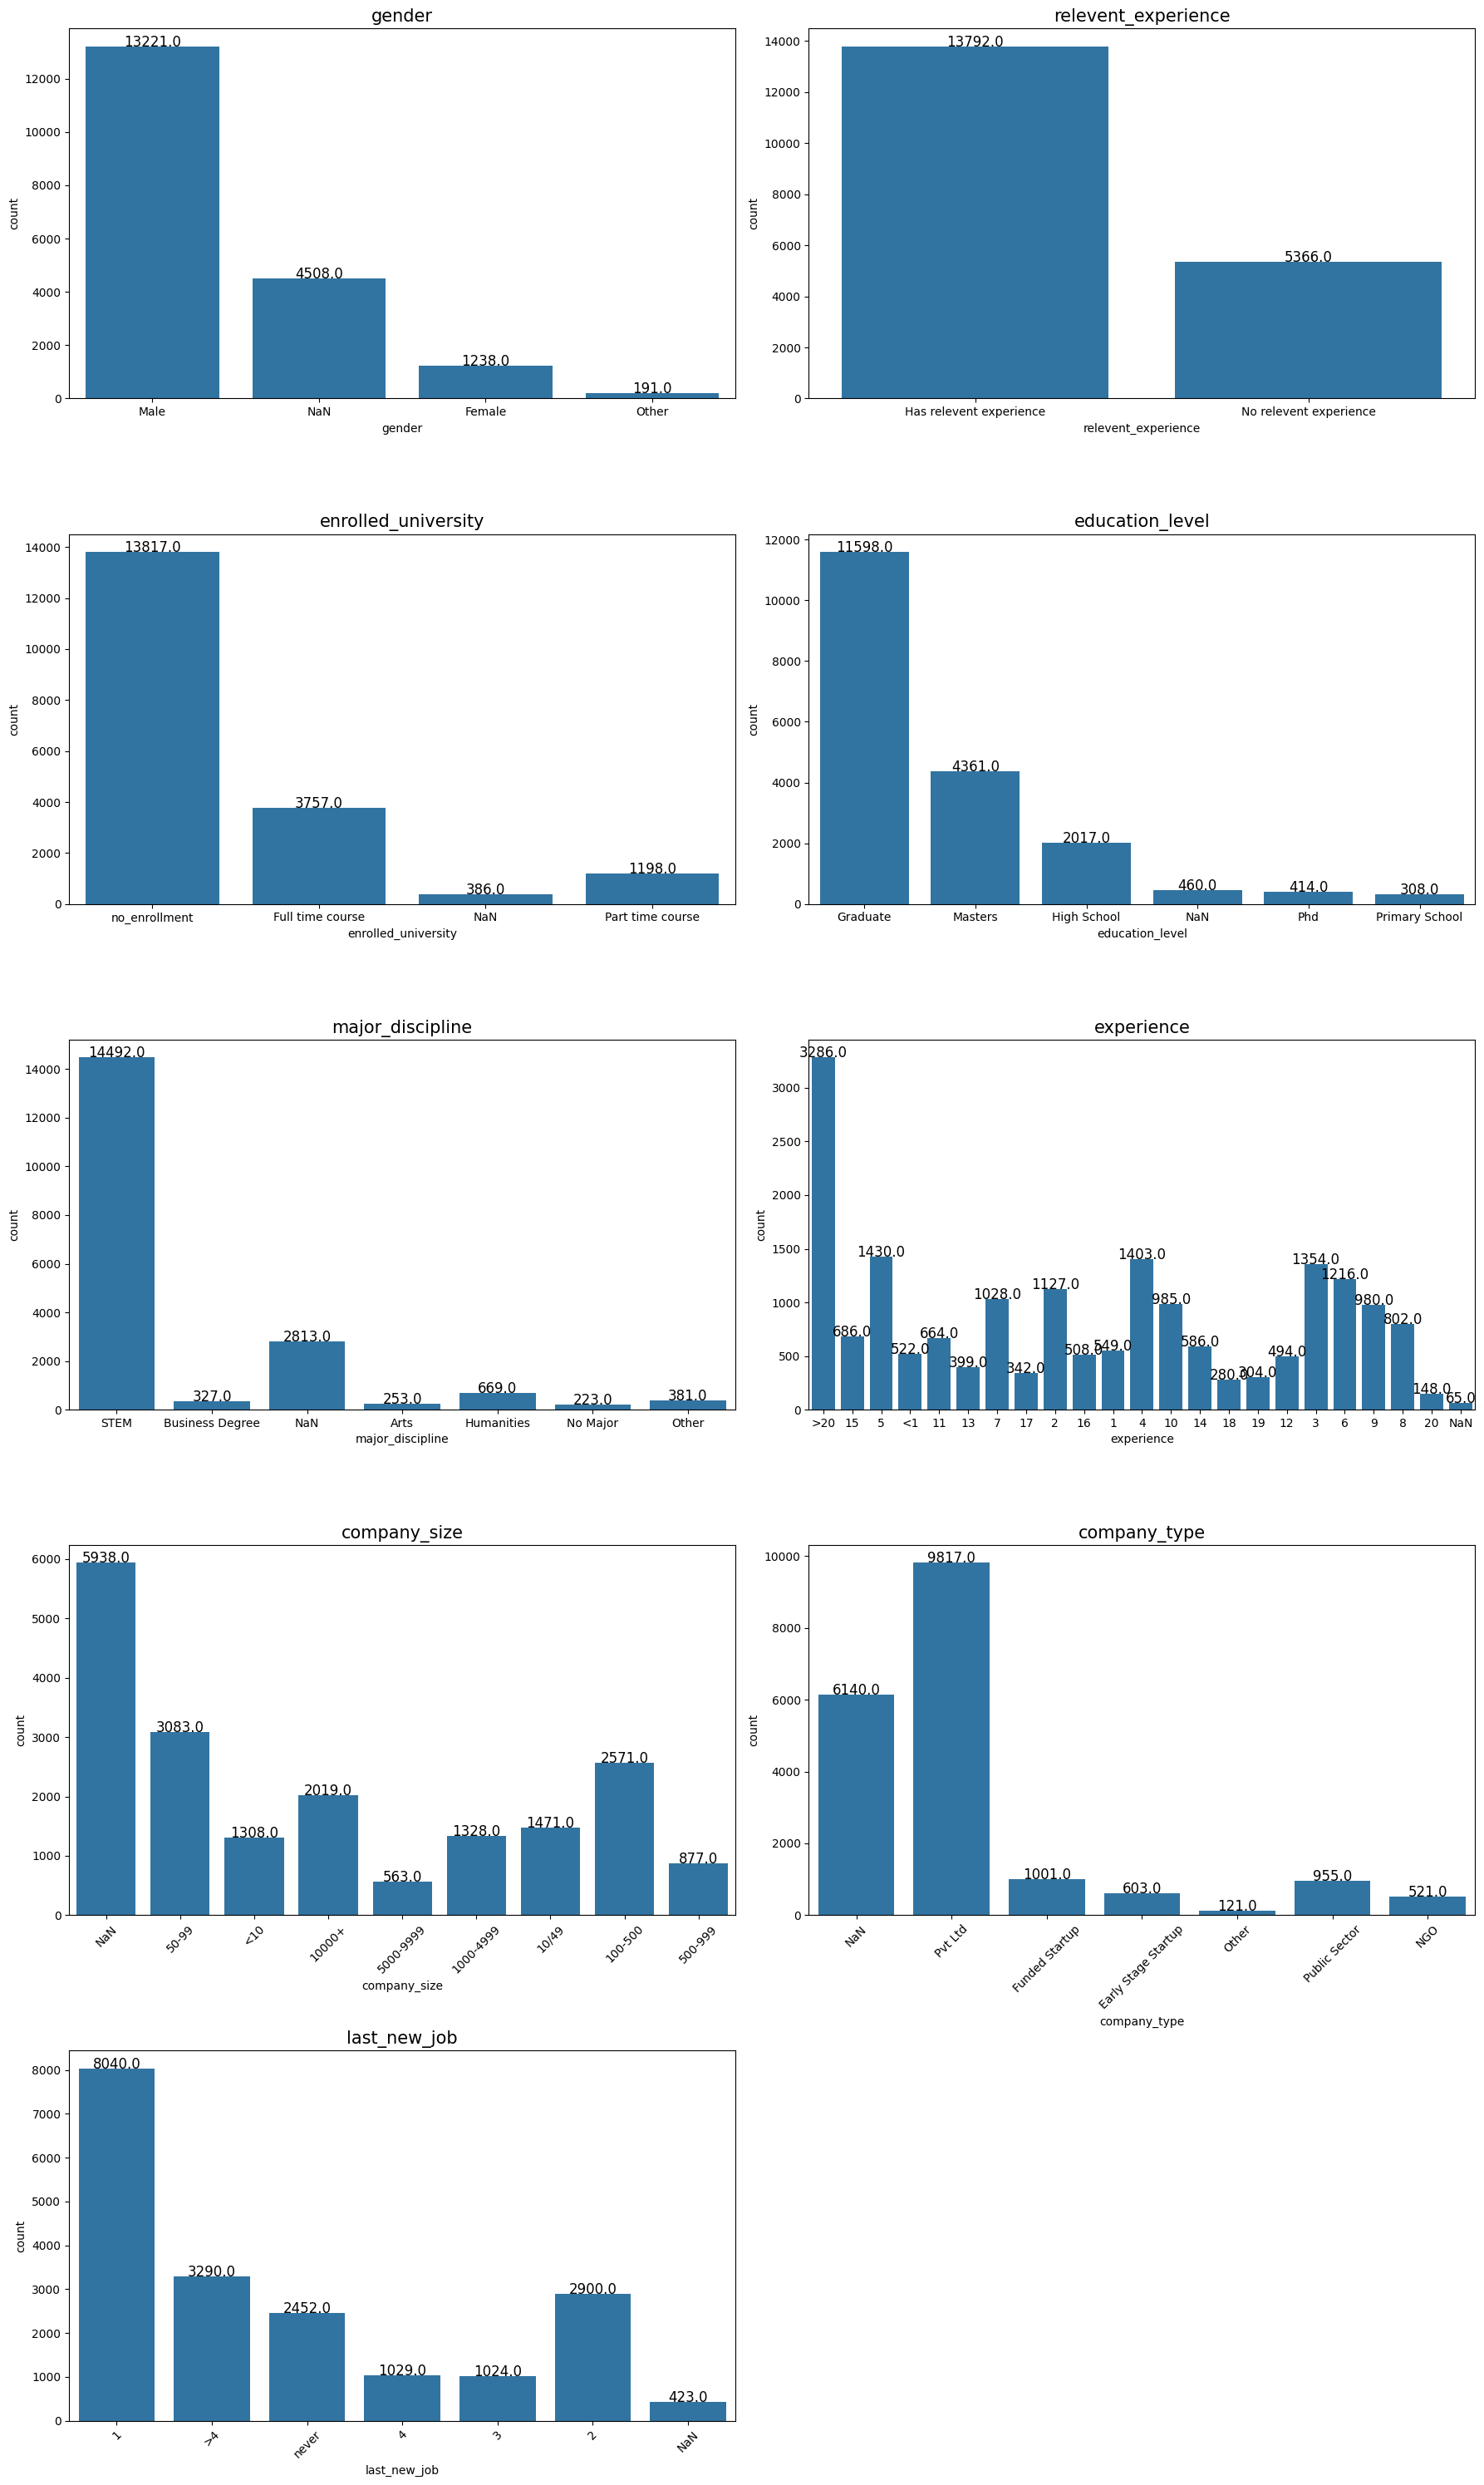

In [10]:
# Plot - Tamanho da figura / Área de Plotagem definindo altura e largura
plt.figure(figsize = (18,30))

# Lista de colunas
column_list = list(df.columns.values)[3:12] #Definindo as colunas do gráfico

# Contador
A = 0

# Loop
for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i) # Gráfico que vai plotar a contagem de elementos de cada categoria. # 'fillna' se tiver valor nulo vai substituir por NaN
    plt.title(i, fontsize = 15) # Título para cada um dos gráficos.
    for p in ax.patches: #Anotações que aparece no topo de cada coluna do gráfico
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), 
                    ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 2)

* **Gender** : a maioria são do gênero masculino.
* **Relevente_experience**: maioria tem alguma experiência.
* **Enrolled_university**: a maioria não está matriculado em algum curso de graduação.
* **Education_level**: a maioria tem cusro de graduação.
* **Major_discipline**: a maioria é da área de exatas.
* **Experience**: a maioria tem mais de 20 anos de experiência.
* **Company_size**: a maioria trabalham em empresa com total de 50 a 99 funcionários.
* **Company_type**: retrata o tipo de empresa que a maioria trabalham.
* **Lastnewjob**: a maioria ficou 1 ano na última empresa.

### Verificando a Distribuição das Variáveis Numéricas

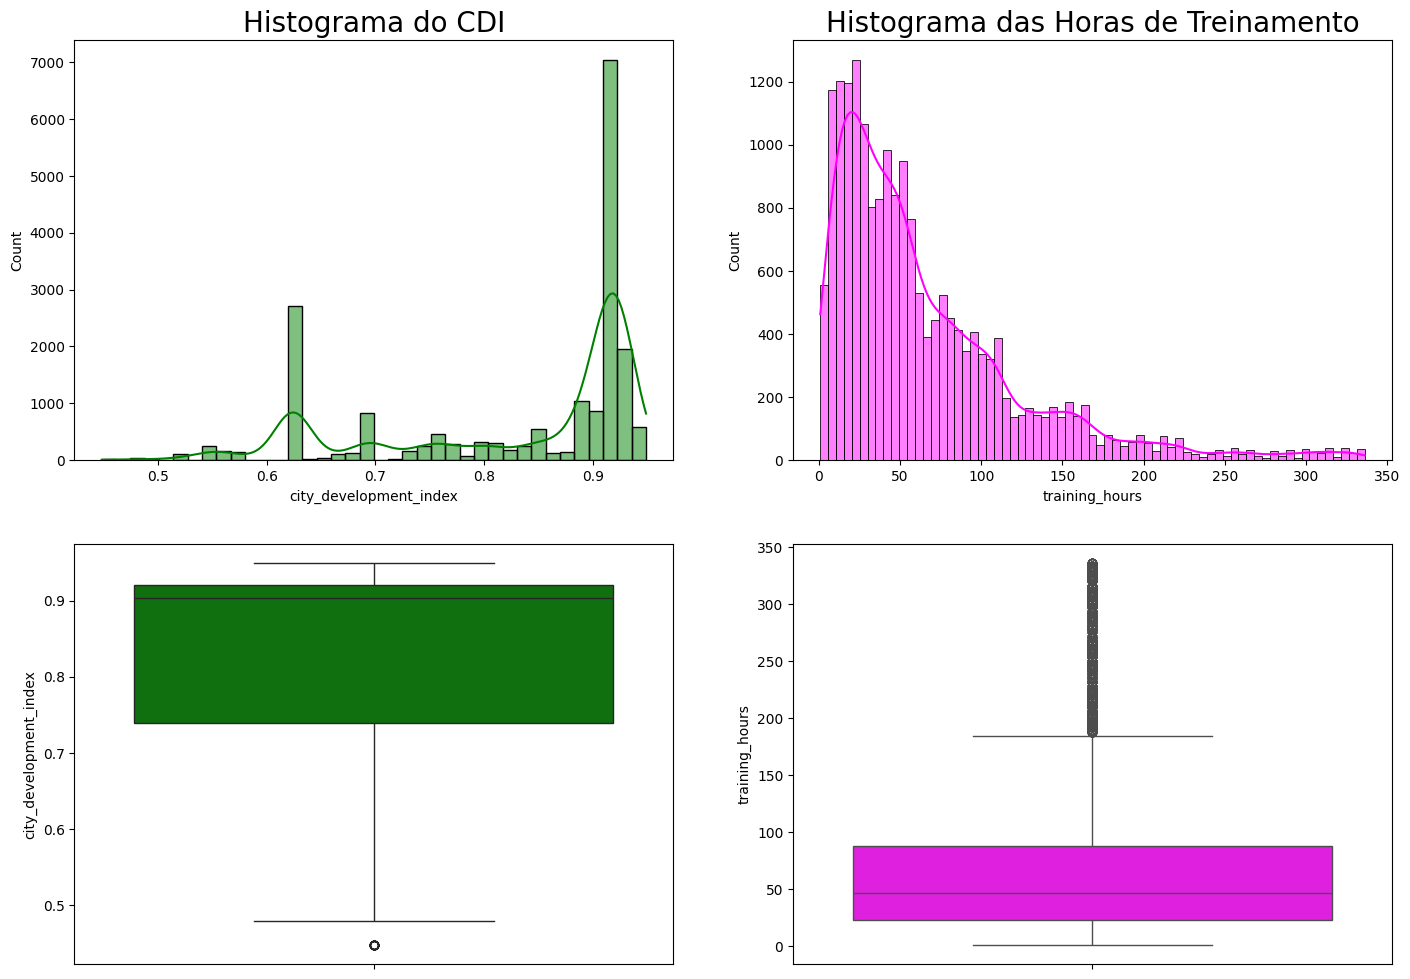

In [11]:
# Figura - Define o tamanho da área de plotagem, colocando altura e largura
plt.figure(figsize = (17,12))

# Subplots com histogramas
plt.subplot(221) #Esse número representa a posição do gráfico
sns.color_palette("hls", 8) #Definindo paleta de cores
sns.histplot(df['city_development_index'], kde = True, color = "green") #kde - Define Curva de densidade
plt.title('Histograma do CDI', fontsize = 20)

plt.subplot(222)
sns.histplot(df['training_hours'], kde = True, color = "magenta")
plt.title('Histograma das Horas de Treinamento', fontsize = 20)

# Subplots com boxplots
plt.subplot(223)
sns.boxplot(df['city_development_index'], color = "green")

plt.subplot(224)
sns.boxplot(df['training_hours'], color = "magenta")

plt.show()

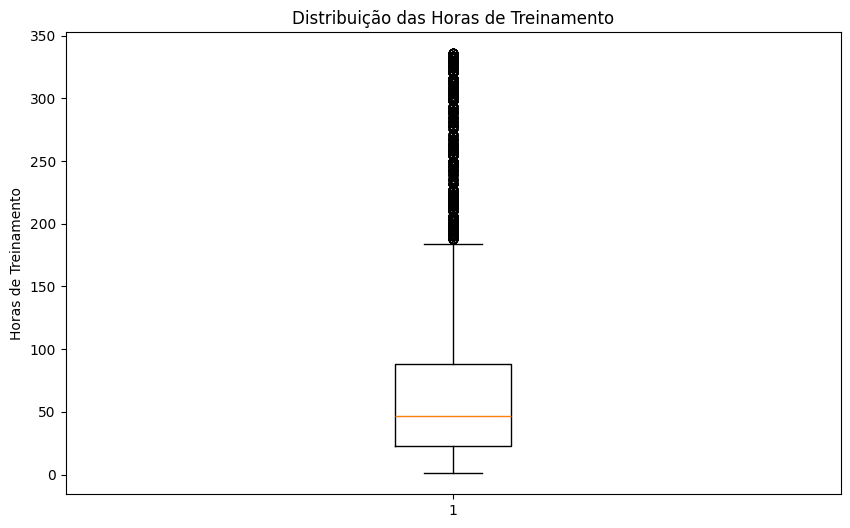

In [4]:
# Criação do gráfico boxplot para a coluna training_hours
plt.figure(figsize=(10, 6))
plt.boxplot(df['training_hours'])
plt.title('Distribuição das Horas de Treinamento')
plt.ylabel('Horas de Treinamento')
plt.show()

A criação dos histogramas e boxplot foram usados para identificar outliers.

### Correlação dos Dados

In [17]:
# Criamos uma cópia do dataframe original
df_numerical = df.copy()

In [18]:
#Visualizando os tipos de dados
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [14]:
#Contando os valores únicos para variável "experience" que representa a experiência dos candidaos em ano.
df_numerical["experience"].value_counts()

experience
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

In [15]:
# Convertemos a variável experience para numérica
df_numerical["experience"] = np.where(df_numerical["experience"] == "<1", 1, df_numerical["experience"]) #Substituindo valor <1 por 1.
df_numerical["experience"] = np.where(df_numerical["experience"] == ">20", 21, df_numerical["experience"]) #Substituindo valor >20 por 21.
df_numerical["experience"] = df_numerical["experience"].astype(float) #Convertendo para dados do tipo float.

In [16]:
df_numerical["experience"].value_counts()

experience
21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: count, dtype: int64

####Realizando o mesmo processo para a variável "last_new_job" que representa a diferença em anos entre o emprego anterior e o emprego atual.

In [17]:
#Contando os valores únicos para variável "last_new_job" 
df_numerical["last_new_job"].value_counts()

last_new_job
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64

In [18]:
# Convertemos a variável last_new_job para numérica
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == "never", 0, df_numerical["last_new_job"]) #Substituindo valor "never" por 0.
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == ">4", 5, df_numerical["last_new_job"]) #Substituindo valor >4 por 5
df_numerical["last_new_job"] = df_numerical["last_new_job"].astype(float) #Convertendo para dados do tipo float.

In [19]:
df_numerical["last_new_job"].value_counts()

last_new_job
1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: count, dtype: int64

In [20]:
df_numerical.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,1.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0


In [21]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

* Podemos verificar que as variáveis "experience" e "last_new_job" agora estão como float. Com base nisso podemos aplicar o coeficiente de correlação para as variáveis numéricas.

In [22]:
# Calculando a correção das variáveis numéricas e excluindo as variáveis categóricas.
df_numerical.drop(["enrollee_id","city","gender","relevent_experience","enrolled_university","education_level",
                   "major_discipline","company_size","company_type"], axis = 1).corr("spearman")

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


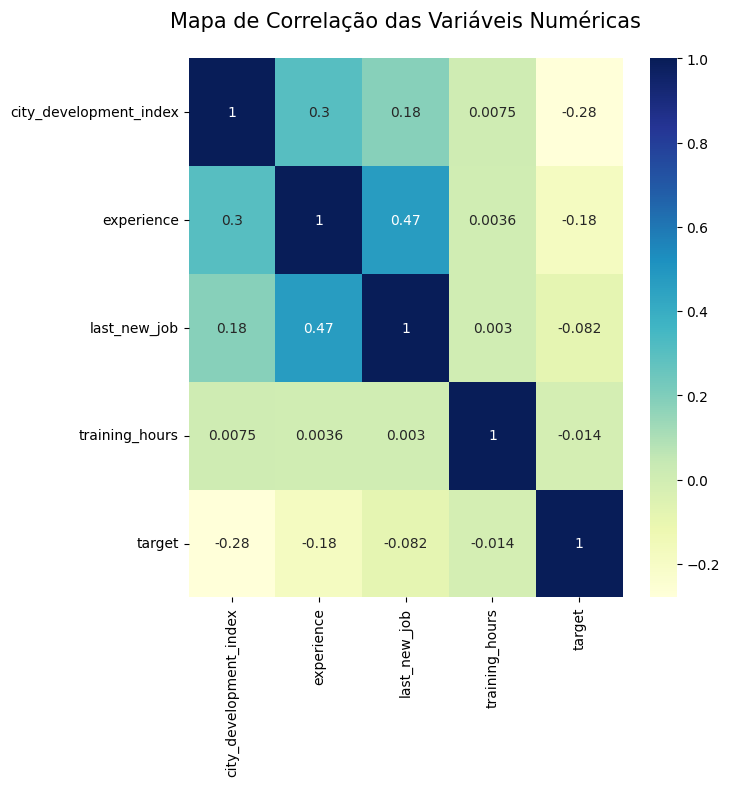

In [23]:
# Heatmap
plt.figure(figsize = (7,7))
sns.heatmap(df_numerical.drop(["enrollee_id","city","gender","relevent_experience","enrolled_university","education_level",
                               "major_discipline","company_size","company_type"], axis = 1).corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

Pela correlação de spearman, last_new_job e experience têm correlação média (0,473), enquanto outros têm correlação fraca.

* Weight of Evidence (WOE) e Information Value (IV)são duas medidas usadas para analisar a  força  de  uma  variável  em  relaçãoà variável  alvo.Embora  possa  ser  usada  com  variáveis numéricas e categóricas normalmente usamos com variáveis categóricas

<Figure size 1000x1200 with 0 Axes>

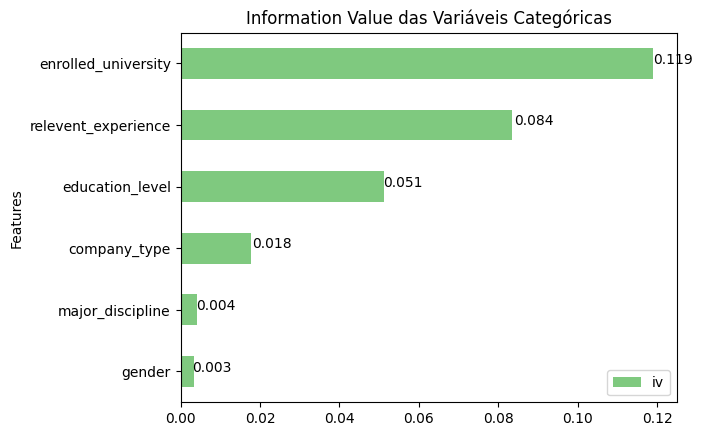

In [24]:
# Plot do Information Value

# Variáveis categóricas
columns_cat = df.drop(columns = ['target',
                                 'enrollee_id',
                                 'city',
                                 'city_development_index',
                                 'training_hours',
                                 'experience',
                                 'last_new_job',
                                 'company_size']).columns

# Lista para o IV
iv = []

# Loop
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

# Dataframe
df_iv = pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by = 'iv')

# Plot
# Figura
plt.figure(figsize = (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = "Accent")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")
plt.show()

 No gráfico acima, podemos ver a ordem dos recursos com base em seu poder preditivo em relação ao alvo.

* Information Value, Poder de Previsão:
* < 0.02, não deve ser usado para previsão
* 0.02 -0.1, preditor fraco
* 0.1 -0.3, preditor médio
* 0.3 -0.5, preditor forte

Com base em seu valor IV, `enrolled_university` é um preditor médio, `relevent_experience` e `education_level` são preditores fracos e os outros são inúteis para a previsão.

### Identificando Valores Ausentes

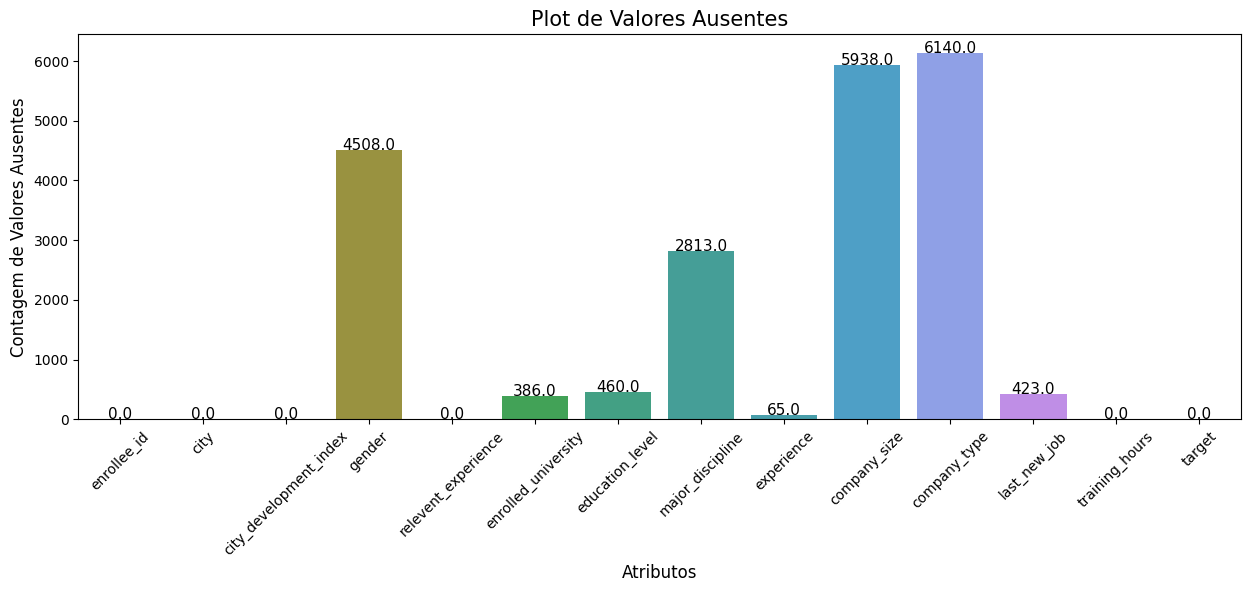

In [25]:
# Valores ausentes por coluna
null_df = df.isna().sum().reset_index()

# Figura
plt.figure(figsize=(15, 5))

# Barplot
ax = sns.barplot(x='index', y=0, data=null_df, palette='husl')
plt.xlabel('Atributos', fontsize=12)
plt.ylabel('Contagem de Valores Ausentes', fontsize=12)
plt.xticks(rotation=45)
plt.title("Plot de Valores Ausentes", fontsize=15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.4, (p.get_height())), ha='center', color='black', size=11)

plt.show()


In [26]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [27]:
colunas_manter = ['city_development_index', 
                  'experience', 
                  'enrolled_university', 
                  'relevent_experience', 
                  'education_level',
                  'company_type',
                  'major_discipline',
                  'target']

In [28]:
new_df = df[colunas_manter]

In [29]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


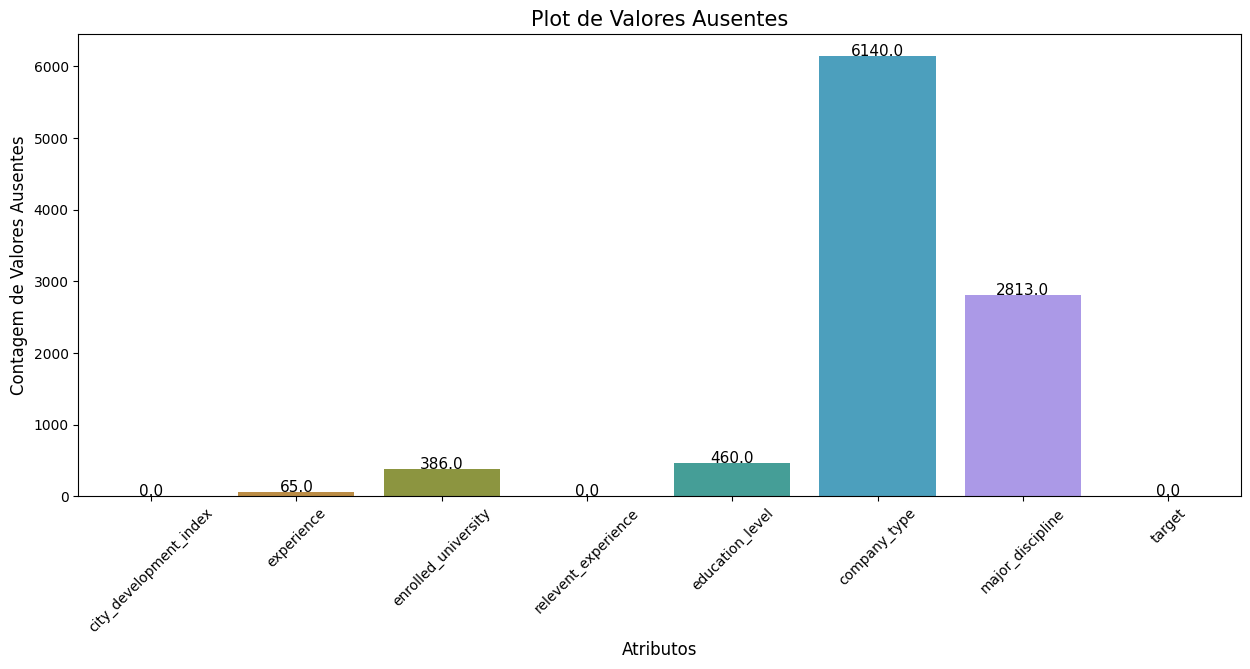

In [30]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(x='index', y=0, data=null_df, palette='husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()